# Arbre de décision

## Introduction

Les arbres de décision sont une méthode utilisées en apprentissage automatique pour réaliser la **classification** et **prédiction** de nombreux phénomènes comme les événéments météorologique par exemple.  

Ils sont populaires parce que le **modèle final** est facile à comprendre par les praticiens et les experts du domaine de l'apprentissage supervisé. L'arbre de décision final peut expliquer exactement pourquoi une **prédiction** spécifique a été faite, ce qui le rend très attrayant pour une utilisation opérationnelle.

Les arbres de décision fournissent également la base pour des méthodes d'ensemble plus avancées telles que les **forêts aléatoires** (Random Forest).

Le code est disponible [ici](https://github.com/mbenhamd/decision-tree-scratch).

### Le but de ce mini-projet est de mettre en application les notions vues en cours :

1. Comment calculer et évaluer les points de partage pour une donnée ?
2. Comment organiser des divisions en une structure d'arbre de décision ainsi que la visualisation ?
3. Comment appliquer l'algorithme de classification à un problème réel et aussi la prédiction  ?

## Description

Un **noeud** représente une seule variable d'entrée (X) et un point de partage sur cette variable, en supposant que la variable est numérique. Les **nœuds feuilles** (également appelés nœuds terminaux) de l'arbre contiennent une variable de sortie (y) qui est utilisée pour effectuer une **prédiction**.

Une fois créé, un arbre peut être parcouru avec une nouvelle rangée de données suivant chaque branche avec les divisions jusqu'à ce qu'une **prédiction** finale soit faite.

La répartition avec le meilleur coût (coût le plus bas car nous minimisons les coûts) est sélectionnée. Ici, la fonction de minimisation sera l'**entropie**, c'est le **principe de minimisation**. Toutes les variables d'entrée et tous les points de partage possibles sont évalués.


## Jeu de données

L'ensemble de données correspond à des données météorologiques consiste à prédire si les données correpondent à une **classe** C comme négative ou P pour positive. Un exemple serait une utilisation agricole pour différents types de plantation que l'on peut posséder par exemple.

L'ensemble de données contient 14 lignes avec 4 variables qualitatives. C'est un problème de classification avec deux classes (classification binaire).

Vous trouverez ci-dessous une liste des quatre variables de l'ensemble de données.

* **Outlook** (variable qualitative : sunny, overcast, rain).
* **Temprature** (variable qualitative : hot, cold, mid).
* **Humidity** (variable qualitative : high, normal, low).
* **Windy** (variable qualitative : false, true).


Voici le contenu du jeu de données :
Pour la phase d'**apprentissage**, l'arbre de décision prend des valeurs numérique, ici nous pratiquons une transformation des **labels**.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
from sklearn import preprocessing
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np

# On lit le csv ici
df = pd.read_csv("random_data.csv")

# Affichage
df.head(10)

#Encodage de la colonne outlook
firstLabelEncoder = preprocessing.LabelEncoder()
firstLabelEncoder.fit(df['outlook'].tolist())
firstColumn = firstLabelEncoder.transform(df['outlook'].tolist())

#Encodage de la colonne temperature
secondLabelEncoder = preprocessing.LabelEncoder()
secondLabelEncoder.fit(df['temperature'].tolist())
secondColumn = secondLabelEncoder.transform(df['temperature'].tolist())

#Encodage de la colonne humidity
thirdLabelEncoder = preprocessing.LabelEncoder()
thirdLabelEncoder.fit(df['humidity'].tolist())
thirdColumn = thirdLabelEncoder.transform(df['humidity'].tolist())

#Encodage de la colonne windy
fourthLabelEncoder = preprocessing.LabelEncoder()
fourthLabelEncoder.fit(df['windy'].tolist())
fourthColumn = fourthLabelEncoder.transform(df['windy'].tolist())

#Encodage de la colonne windy
fifthLabelEncoder = preprocessing.LabelEncoder()
fifthLabelEncoder.fit(df['C'].tolist())
fifthColumn = fifthLabelEncoder.transform(df['C'].tolist())

# Création de la table
encodedData = dict( outlook = np.array(firstColumn), 
                   temperature = np.array(secondColumn), 
                   humidity = np.array(thirdColumn), 
                   windy = np.array(fourthColumn), 
                   C = np.array(fifthColumn))

# Encodage sous forme de DF
finalDF = pd.DataFrame.from_dict(encodedData)

# Pour une raison obscure, la colonne C n'est pas dans l'ordre ...
finalDF.head(10)


,C,humidity,outlook,temperature,windy
0,0,1,0,2,1
1,0,2,1,0,0
2,1,0,1,2,0
3,0,1,1,0,1
4,0,1,2,0,0
5,1,0,2,1,0
6,0,1,1,0,0
7,1,2,0,2,1
8,0,1,2,1,1
9,0,1,1,1,1


## Indice d'entropie

L'**index d'entropie** est le nom de la fonction de coût utilisée pour évaluer les divisions dans l'ensemble de données dans notre cas (d'autres fonctions peuvent être utilisé comme la fonction Gini).

Un **score de l'entropie** donne une idée de la **qualité** d'une scission en fonction du mélange des classes dans les deux groupes créés par la scission.

Nous devons d'abord calculer la proportion de classes dans chaque groupe.

*proportion = count(class_value) / count(rows)*

Ici l'entropie est E(s) = \begin{equation} \sum -p(c)\log_2 c \end{equation}

Définissons la routine suivante :

In [2]:
def entropie(s):
    resultat = 0.0
    valeur, compteur = np.unique(s, return_counts=True)
    freqs = compteur.astype('float')/len(s)
    for p in freqs:
        if p != 0.0:
            resultat -= p * np.log2(p)
    return resultat

entropie(finalDF['C'])

0.9999971146079947

Maintenant que nous avons une mesure de pureté, nous allons introduire une nouvelle appelée **information mutuelle** (ou **gain d'entropie**).
Voici la routine :

In [3]:
def gain(y, x):

    resultat = entropie(y)

    # On comptabilise le nombre d'attribut
    valeur, compteur = np.unique(x, return_counts=True)
    frequences = compteur.astype('float')/len(x)

    # Moyenne ponderé par l'entropie 
    for p, v in zip(frequences, valeur):
        resultat -= p * entropie(y[x == v])
    return resultat

In [4]:
gain(finalDF['C'],finalDF['outlook'])

1.8684686673431372e-05

L'entrée y est correspond à la colonne C de notre tableau, c'est la colonne qui correspondant à la classification effectué (N ou P). Pour la valeur x, il s'agit des autres attribut que l'on va partager : *humidity, outlook, temperature, windy*.


# Exemple avec scikit-learn et la classe *DecisionTreeClassifier*


Par défaut, la fonction de mesure utilisé par **scikit-learn** est *Gini* alors nous changons cette valeur par *l'entropie*.
Pour commencer, nous allons générer les 4 matrices habituelles pour tester la méthode d'apprentissage automatique puis afficher le tableau entrainé et sa sortie correspondante.

In [5]:
from sklearn.model_selection import train_test_split

X = finalDF.drop('C', axis=1)
y = finalDF['C']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=1)

X_train.head(10)
y_train.head(10)


,humidity,outlook,temperature,windy
4925,0,0,2,1
3341,0,1,2,0
2470,0,2,1,1
270,1,0,1,1
8123,0,1,0,0
1398,0,2,1,0
9299,1,1,2,0
4739,1,2,2,1
5055,1,0,2,0
2866,1,2,0,1


4925    1
3341    0
2470    0
270     1
8123    1
1398    1
9299    1
4739    1
5055    0
2866    0
Name: C, dtype: int64

On partage nos données ici, *y_train* correspondant ici à l'objectif en sortie contenant la ligne et sa classe C d'appartenance puis *X_train* est le jeu d'entrainement qui servira de données entrant pour la phase d'apprentissage.

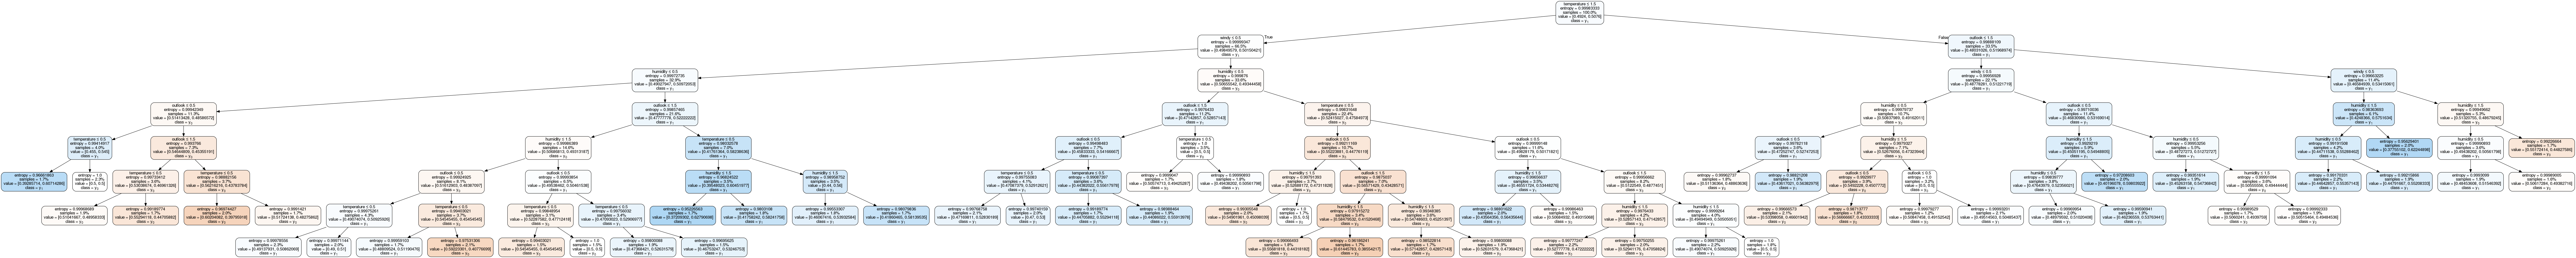

True

In [6]:
from sklearn import tree
from sklearn.metrics import accuracy_score
import graphviz 
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
#Initialisation de la classification avec comme critère : l'entropie
clf = tree.DecisionTreeClassifier(criterion='entropy')


# Input : 4 variables ; Target : classe C classification binaire
clf = clf.fit(X_train, y_train)

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
filled=True,
label='all',
proportion=True,
feature_names=['humidity','outlook','temperature','windy'],                                
class_names=True,
rounded=True,
precision=8,
impurity=True,
special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())
graph.write_png("Decision Tree For Weather.png")



Ici les branches sont représentés de sorte à ce que le fils gauche correspond à la valeur *True* et le fils droit *False*.
Les options suivantes ont été activés afin d'obtenir des informations pertinantes pour l'interprétation:
Les noms de classes correspondentes bien au noms de colonnes afin de faciliter la lecture.
La représentation de l'échantillon pour chaque noeud a été mis sous forme de pourcentage.
Pour plus de clarté, l'arbre de décision est enregistré sous un format image *png*.
Ici l'interprétation est libre suivant les données que l'utilisation entre aux début du notebook.

In [7]:
from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)

# Cette fonction permet de calculer la précision du modèle
accuracy_score(y_test, y_predict)

0.5128

In [8]:
from sklearn.metrics import confusion_matrix


pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not C', 'Predicted C'],
    index=['True Not C', 'True C']
)

,Predicted Not C,Predicted C
True Not C,1308,1220
True C,1216,1256


**Matrice de confusion** : 2564 valeurs on été prédit correctement sur les 5000.

# Conclusion

Avec un jeu de données générer aléatoirement de 10 000 lignes, l'arbre de décision ayant eu 50% du jeu de données en entrainement (*train_size=0.5*) obtient une précision de 51,28%.
Le résultat est très faible certes mais il est important à noter que finalement le jeu données générer n'a aucun sens particulier et ne suis aucune logique même si l'implémentation des nombres aléatoire n'est en réailité que "pseudo-aléatoires" suivant des modèles mathématiques pour chaque valeurs des colonnes sans aucun lien.

Le but de ce notebook était de voir les plusieurs notions autour des arbres de décision comme le calcul de l'entropie, le principe de gain puis l'utilisation d'une librairie (**Scikit-Learn**) pour faire de la classification et de la prédiction.



# Annexe

Le code générant des données aléatoire pour réaliser l'apprentissage :

file = read.csv("test_data.csv")
s = as.matrix.data.frame(file)

### Names of columns
namescol = c("outlook","temperature","humidity","windy","C")



### All possible values for each columns
outlook_possible_values = c("sunny","overcast","rain")
temperature_possible_values = c("hot","mid","cold")
humidity_possible_values = c("high","normal","low")
windy_possible_values = c("true","false")
C_possible_values = c("N","P")

###   Matrix representing all possible values
matrix_all_values = cbind(outlook_possible_values,
                          temperature_possible_values,
                          humidity_possible_values,
                          windy_possible_values,
                          C_possible_values)


### Vector of possible indexes for generating a line
rand_values_for_all = c(floor(runif(1, 1,4)),
                        floor(runif(1, 1,4)),
                        floor(runif(1, 1,4)),
                        floor(runif(1, 1,3)),
                        floor(runif(1, 1,3)))

### Line computed
ligne = cbind(outlook_possible_values[rand_values_for_all[1]],
              temperature_possible_values[rand_values_for_all[2]],
              humidity_possible_values[rand_values_for_all[3]],
              windy_possible_values[rand_values_for_all[4]],
              C_possible_values[rand_values_for_all[5]])


### Function that will generate a data dataframe of n random lines
generate_n_line = function(nline = 100){
    final = vector()
    for( i in seq(1:nline)){
    rand_values_for_all = c(floor(runif(1, 1,4)),
                            floor(runif(1, 1,4)),
                            floor(runif(1, 1,4)),
                            floor(runif(1, 1,3)),
                            floor(runif(1, 1,3)))    
    ligne = cbind(outlook_possible_values[rand_values_for_all[1]],
                  temperature_possible_values[rand_values_for_all[2]],
                  humidity_possible_values[rand_values_for_all[3]],
                  windy_possible_values[rand_values_for_all[4]],
                  C_possible_values[rand_values_for_all[5]])  
    final=rbind(final,ligne)
    }
    colnames(final) = namescol
    return(final)
}

### Test
test = generate_n_line(10000)
test

### Write into a csv
write.csv(test,"random_data.csv",row.names=FALSE)
